In [5]:
#1. 라이브러리 및 데이터셋 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 시각화 한글 깨짐 방지 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("train.csv")
# df 데이터프레임 행, 컬럼 수 출력
df.shape

(891, 12)

In [6]:
# df 데이터 프레임 상위 5개 출력
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# 데이터 구조 보기
# 결측치랑 타입 확인해보면 좋음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# 2. 결측치 탐색
# 각 컬럼마다 결측치 개수 출력
# 결측치 개수가 많으면 데이터 분석에서 제외하는 편임(ex.Cabin)
# Age, Embarked는 결측치 채우는 방향으로 하면 좋음
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

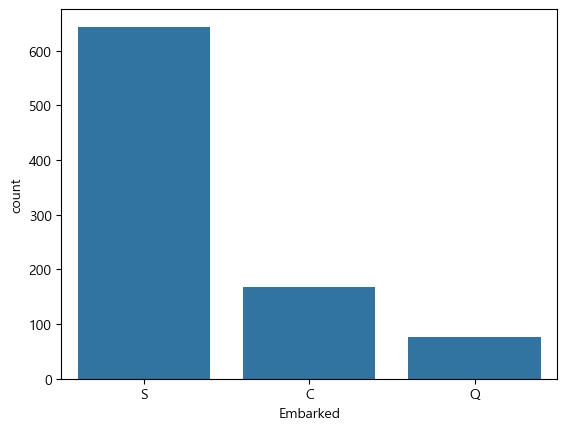

In [15]:
# 3. 단변량 분석(변수 하나에 대해서 탐색)

# 3-1. 범주형 데이터의 분포 확인
# 범주형 데이터 : Embarked, Sex, Pclass

# Embarked의 분포
# 탐승 항구별 입장객 수(countplot: 범주형 데이터에 대한 값의 빈도)
sns.countplot(data=df, x='Embarked')

<Axes: xlabel='Pclass', ylabel='count'>

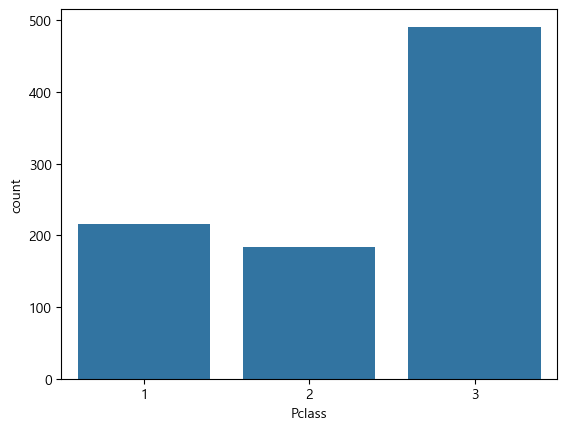

In [16]:
# Pclass에 대한 분포
sns.countplot(data=df, x='Pclass')

<Axes: xlabel='Sex', ylabel='count'>

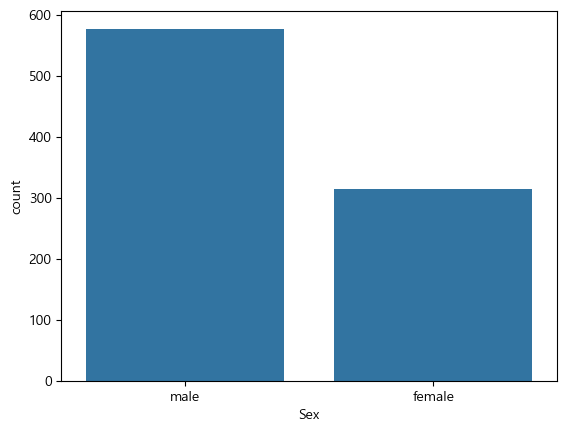

In [17]:
# Sex(성별)에 대한 분포
sns.countplot(data=df, x='Sex')

In [19]:
# 4. 수치형 변수에 대한 분포 및 탐색
# 수치형 변수 -> 통계값 확인 가능 (ex. 평균 나이, 평균 운임 요금 등)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Fare'>

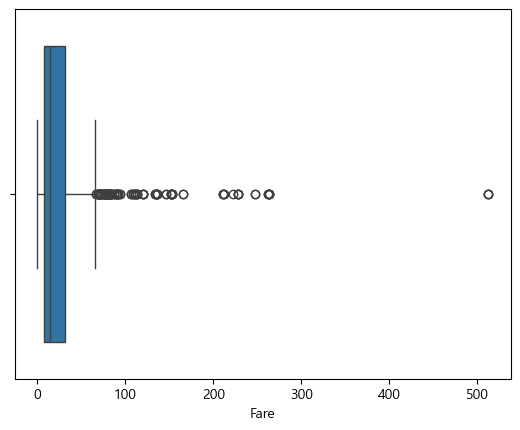

In [20]:
# Fare 컬럼에 대한 분포를 Boxplot으로 확인
sns.boxplot(data=df, x ='Fare')

<Axes: xlabel='Age', ylabel='Count'>

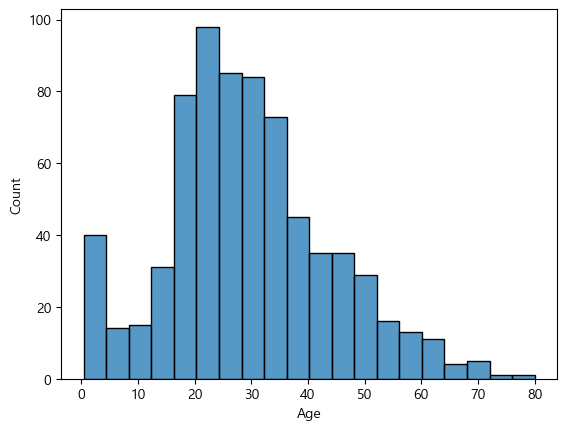

In [29]:
# 수치형 -> Age(나이), SibSp(형제자매 수), Parch(부모 수)
# 히스토그램으로 나이 분포도 확인
sns.histplot(data=df, x='Age')

<Axes: xlabel='SibSp', ylabel='Count'>

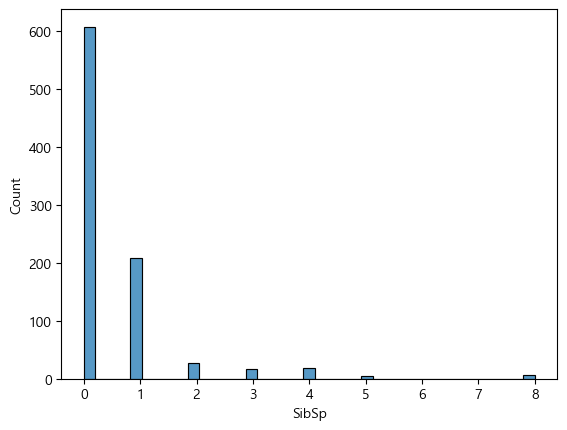

In [27]:
# SibSp(형제/자매/배우자의 수(본인 제외)): SibSP 분포 확인
# 0: 혼자 탄 사람
sns.histplot(data=df, x="SibSp")

<Axes: xlabel='Parch', ylabel='Count'>

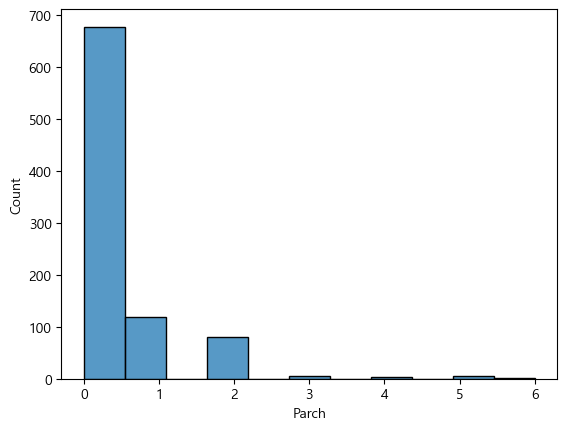

In [30]:
# 함께 탑승한 부모와 자녀의 수(본인 제외) : Parch
sns.histplot(data=df, x='Parch')

In [31]:
# 5. 타겟 변수(Survived)에 대한 탐색

# 생존 여부에 대한 고유 빈도수
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [32]:
# 평균 생존률
# 1(생존) 다 더해서 전체 승객수로 나눠서 평균 구함
df['Survived'].mean()

np.float64(0.3838383838383838)

<Axes: xlabel='Survived', ylabel='count'>

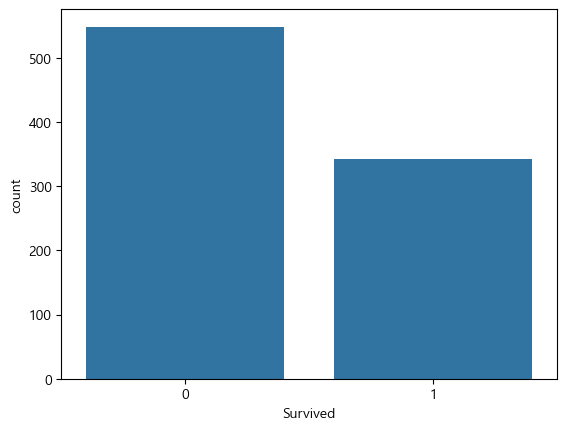

In [35]:
# 생존 여부에 대한 분포
sns.countplot(data=df, x='Survived')

Survived
0    549
1    342
Name: count, dtype: int64


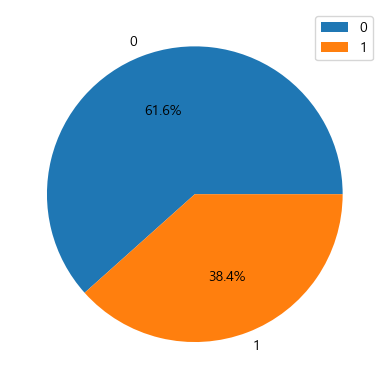

In [42]:
# 생존/사망에 대한 비율 -> 파이차트로 확인(비율)

# 생존률을 파이 차트를 활용해 시각적 표현
survived = df['Survived'].value_counts()
print(survived)

data = survived.values.tolist() #값 추출
labels = survived.index.tolist() # 인덱스 추출

plt.pie(x=data, labels=labels, autopct="%.1f%%") # labels=['사망','생존']으로 바꾸면 가독성 좋음
plt.legend()


In [44]:
# 6. 다변량 분석(여러 개의 변수 간의 관계)
# 타켓 변수인 Survived와 다른 변수와의 관계를 파악

<Axes: xlabel='Pclass', ylabel='count'>

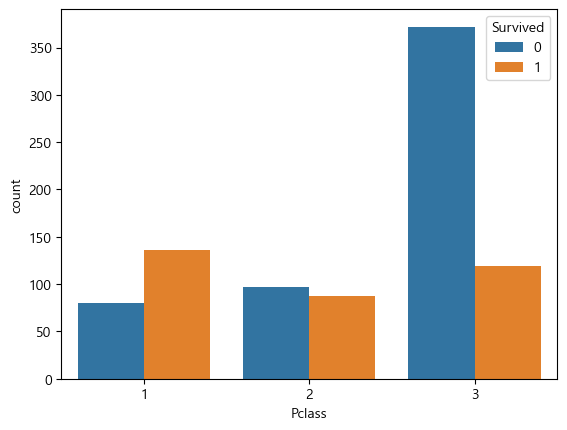

In [45]:
# 6-1. 생존여부와 Pclass의 관계
# 분포 확인
sns.countplot(data=df, x='Pclass', hue='Survived')

Text(0.5, 1.0, '생존자수의 선실등급 비율')

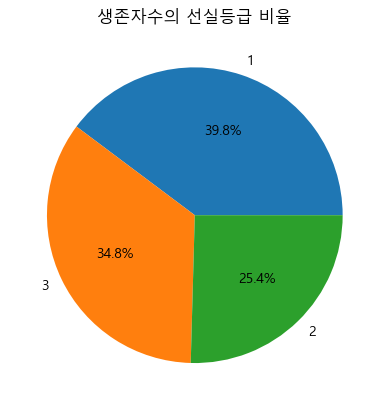

In [47]:
#Pclass와 생존 여부에 대한 비율 (Pclass와 생존에 대한 비율)
survived_pclass = df[df['Survived'] == 1]['Pclass'].value_counts()

plt.pie(x=survived_pclass.values.tolist(), labels=survived_pclass.index.tolist(), autopct='%.1f%%') # 값과 라벨 추출 후, 파이 차트 그리기
plt.title('생존자수의 선실등급 비율')

<Axes: xlabel='Sex', ylabel='count'>

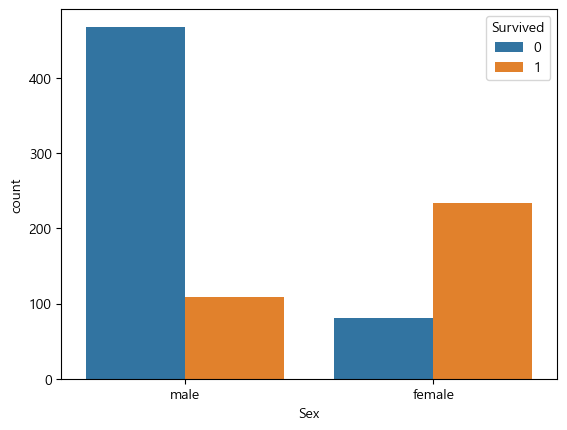

In [48]:
# 6-2. 성별에 따른 생존 여부 탐색
# 분포 확인
sns.countplot(data=df, x='Sex', hue='Survived')

In [58]:
# 성별에 따른 평균 생존률
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [61]:
# [TODO] 성별에 따른 생존률을 파이차트로!
df2 = df.groupby("Sex")["Survived"].mean()
df_sex_survived = df2.reset_index()
print(df_sex_survived)

data = df_sex_survived['Sex']
labels = df_sex_survived['Survived']

# plt.pie(x = data, labels=labels, autopct='%.3f%%')

      Sex  Survived
0  female  0.742038
1    male  0.188908


<Axes: xlabel='Age', ylabel='Count'>

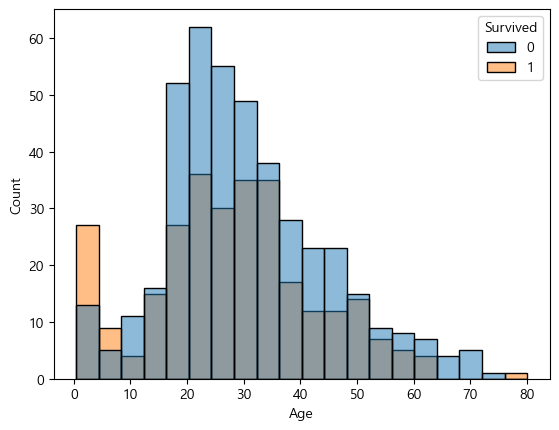

In [57]:
# 6-3. 나이에 따른 생존 여부 탐색
# 나이의 생존여부 분포 ; 나이 -> 연속형 데이터
sns.histplot(data=df, x='Age', hue='Survived')

C:\Users\USER\AppData\Local\Temp\ipykernel_13060\3682104010.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_by_bin = tmp.groupby('AgeBin')['Survived'].mean().mul(100).reset_index()


(0.0, 100.0)

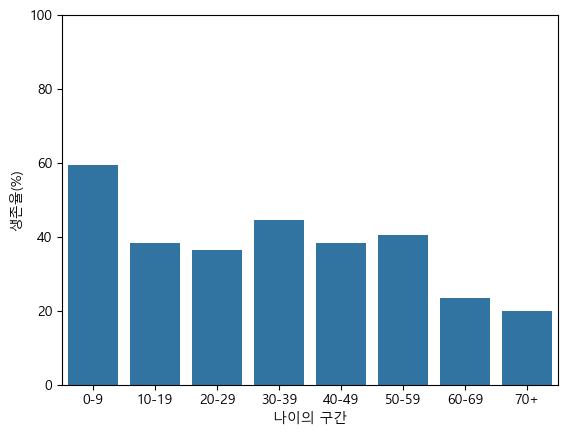

In [67]:
# 나이 결측치 제거
tmp = df.dropna(subset=["Age","Survived"]).copy()

# 구간의 범위 지정
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]

# 각 구간의 이름(라벨) / 범주화(구간화) 하는것
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# cut() 함수 : 연속형 데이터를 구간(범주)로 나누는 함수
tmp['AgeBin'] = pd.cut(tmp['Age'], bins=bins, labels=labels)

# 각 나이 구간마다의 평균 생존율(%)로 확인
# 각 구간을 그룹화 -> 평균 -> 100 곱해서 백분율 형태
rate_by_bin = tmp.groupby('AgeBin')['Survived'].mean().mul(100).reset_index()
# print(rate_by_bin)

sns.barplot(data=rate_by_bin, x='AgeBin', y='Survived')
plt.xlabel('나이의 구간')
plt.ylabel('생존율(%)')
plt.ylim(0,100)

<Axes: xlabel='SibSp', ylabel='count'>

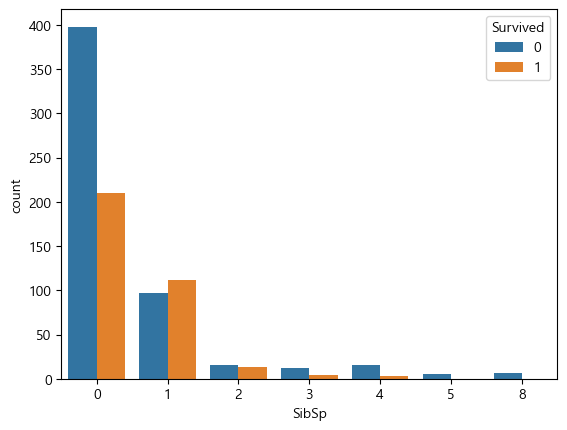

In [69]:
#6-4. 타겟 변수와 SibSp, Parch
# SibSp 분포 , 생존여부로 그룹화
sns.countplot(data=df, x='SibSp', hue='Survived')


<Axes: xlabel='Parch', ylabel='count'>

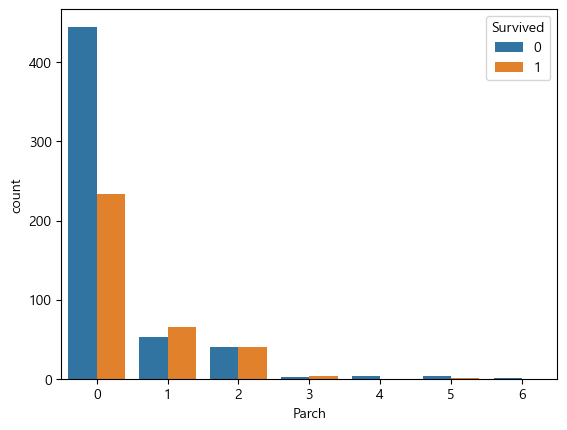

In [70]:
# Parch 분포
sns.countplot(data=df, x='Parch', hue = 'Survived')

   Family  Survived
0       0  0.303538
1       1  0.552795
2       2  0.578431
3       3  0.724138
4       4  0.200000
5       5  0.136364
6       6  0.333333
7       7  0.000000
8      10  0.000000


(0.0, 1.0)

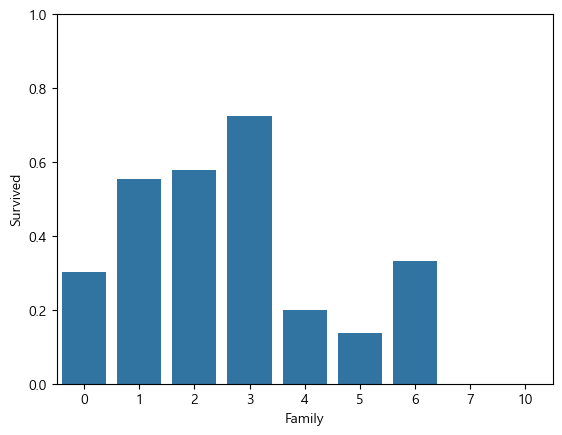

In [78]:
# SibSp와 Parch 합치기
df['Family'] = df['SibSp'] + df['Parch']
# print(df)

# 가족 수에 따른 평균 생존률 시각화 -> 가족의 수를 그룹으로 묶고 생존여부를 평균으로 구해주면 됨
grouped_family = df.groupby("Family")["Survived"].mean().reset_index()
print(grouped_family)
sns.barplot(data=grouped_family, x="Family", y="Survived")
plt.ylim(0,1)

<Axes: xlabel='Embarked', ylabel='count'>

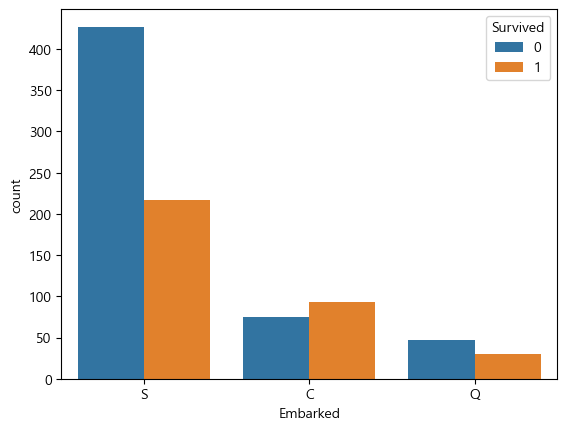

In [79]:
#6-5. 타겟 변수와 Embarked(탑승구)와의 탐색
# 분포 확인
sns.countplot(data=df, x="Embarked", hue = "Survived")

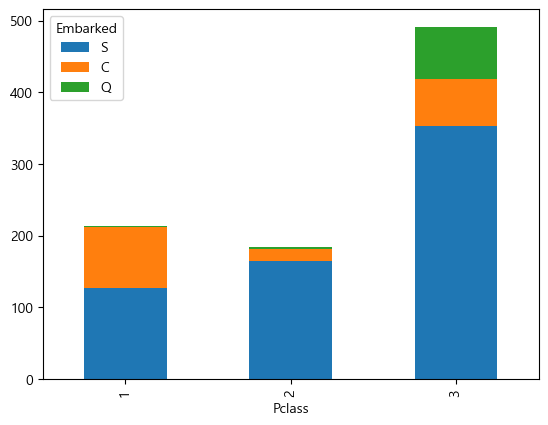

In [83]:
# 탑승구가 돈과 연관되어 있는지 티켓 등급과 같이 분석
# Pclass와 Embarked에 따른 생존여부
# 왜 S 항구에서 사망이 제일 많을까 -> 티켓 등급과 연결해서 확인

# 교차 빈도 구하기 : crosstab() -> 두 개 이상의 범주형 변수 간의 교차 빈도표 생성
freq = pd.crosstab(df['Pclass'], df['Embarked'])
# 원래 순서 : C-> Q -> S
# 변경 원하는 순서 : S -> C -> Q
freq = freq[['S','C','Q']]

# 막대 그래프인데 누적 막대 그래프(stacked라서)
freq.plot(kind='bar', stacked=True)
plt.legend(title = 'Embarked')

<Axes: >

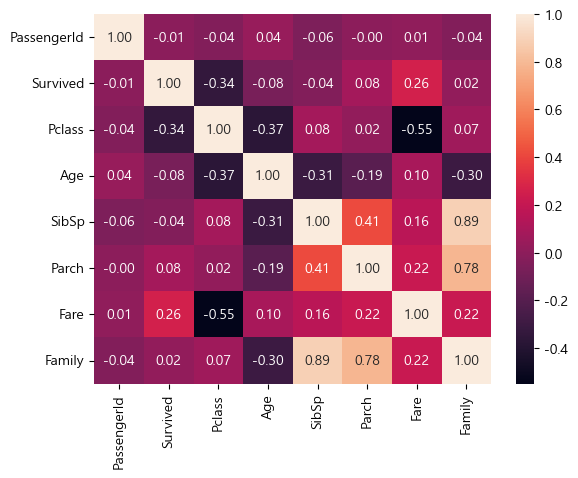

In [84]:
# 변수 간의 상관관계 파악해보기
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')

<Axes: xlabel='Pclass', ylabel='Survived'>

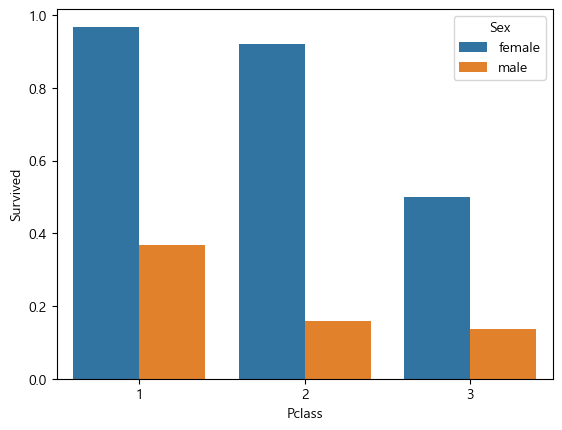

In [85]:
# Pclass(티켓등급)와 생존률의 관계를 성별에 따라서 확인
# Pclass, Survived, Sex: 3개의 컬럼에 대한 복합 분석

#Pclass에 따른 생존률의 평균
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', errorbar=None)